# Activation Functions Requirements

## Core Theoretical Requirements


### **Non-Linearity**
**Requirement**: The activation function  $\sigma(x)$ must satisfy $\sigma(ax + b) \neq a\sigma(x) + b$ for some $a, b \in \mathbb{R}$.

**Rationale**: Linear transformations through network layers would result in an overall linear model, regardless of depth. Non-linearity enables universal function approximation (Cybenko, 1989).

**Example**:
- **ReLU**: $\sigma(x) = \max(0, x)$  ✓ Non-linear
- **Linear**: $\sigma(x) = x$ ✗ Linear (collapses multi-layer networks)

**Insight**: Even a single non-linear layer suffices for universal approximation, but distributed non-lineality enhances gradient flow.


### **Differentiability (Almost Everywhere)**
**Requirement**: $\sigma(x)$ must be differentiable except possibly at finitely many points, with subgradients defined where non-differentiable.

**Rationale**: Enables backpropagation via the chain rule: $\frac{\partial L}{\partial w} = \frac{\partial L}{\partial z} \cdot \sigma'(z) \cdot x.$

**Example Comparison**:
```
ReLU: σ'(x) = {1 if x > 0, 0 if x < 0, [0,1] if x = 0}
Sigmoid: σ'(x) = σ(x)(1 - σ(x)) ∈ (0, 0.25)
```
**Practical Note**: ReLU's subgradient at zero prevents gradient explosion while maintaining computational efficiency.

### **Bounded or Unbounded Output Range**
**Requirement**: Either bounded (e.g., [0,1]) for probability-like outputs or unbounded for regression tasks.

**Rationale**: Matches problem requirements—sigmoid/tanh for binary classification, ReLU/Linear for regression.

**Table: Output Range Requirements by Task**
| Task | Required Range | Recommended Activation |
|------|----------------|----------------------|
| Binary Classification | [0,1] | Sigmoid |
| Multi-class | Probability Simplex | Softmax |
| Regression | ℝ | ReLU/Linear |
| Attention Weights | [0,1] | Softmax |


## Optimization-Focused Requirements

### **Gradient Stability (Vanishing/Exploding Gradient Avoidance)**
**Requirement**: $|\sigma'(x)|$ should remain in reasonable range (typically [0.1, 2]) across input domain.

**Mathematical Analysis**:
- **Sigmoid**: $\sigma'(x) = \frac{e^{-x}}{(1+e^{-x})^2}$, saturates at $0$ for $|x| > 4$
- **ReLU**: $\sigma'(x) = 1$ for $x > 0$, avoids saturation

**Empirical Evidence**: Goodfellow et al. (2016) show ReLU converges 6× faster than tanh on MNIST.

### **Zero-Centered Output (Desirable)**
**Requirement**: $\mathbb{E}[\sigma(x)] \approx 0$ for zero-mean inputs.

**Rationale**: Prevents zig-zag gradients in optimization.

**Example**:
```
Tanh: [-1, 1], zero-centered ✓
ReLU: [0, ∞), biased toward positive ✗
Leaky ReLU: Addresses bias with αx for x < 0
```

### **Computational Efficiency**
**Requirement**: $O(1)$ time complexity, vectorizable operations.

**Benchmark (per 1M neurons)**:
```
ReLU: 1.2 ms
Sigmoid: 3.8 ms
Swish: 4.2 ms
```


### **Monotonicity (Desirable)**
**Requirement**: $\sigma'(x) \geq 0$ preserves gradient direction.

**Insight**: Non-monotonic functions (e.g., Gaussian) create optimization pathologies.


## Complete Requirements Checklist

ACTIVATION FUNCTION REQUIREMENTS MATRIX

Property          | Essential | Desirable | ReLU | LeakyReLU | Tanh | Sigmoid | Swish | GELU
-----------------|-----------|-----------|------|-----------|------|---------|-------|------
Non-linearity    | ✓         |           | ✓    | ✓         | ✓    | ✓       | ✓     | ✓
Differentiability| ✓         |           | ✓    | ✓         | ✓    | ✓       | ✓     | ✓
Gradient Flow    |           | ✓         | ✓    | ✓✓        | ✗    | ✗✗      | ✓✓    | ✓✓
Zero-Centered    |           | ✓         | ✗    | ✗         | ✓    | ✗       | ~     | ~
Computational    |           | ✓         | ✓✓   | ✓✓        | ✗    | ✗       | ✗     | ✗
Smoothness       |           | ✓         | ✗    | ✗         | ✓    | ✓       | ✓✓    | ✓✓
Monotonic        |           | ✓         | ✓    | ✓         | ✓    | ✓       | ~     | ✓

## References & Further Reading

1. **Cybenko, G. (1989)**. Approximation by superpositions of sigmoidal function. *Math. Control Signals Systems*.
2. **Goodfellow, I., et al. (2016)**. Deep Learning. MIT Press. [Chapter 6: Deep Feedforward Networks](http://www.deeplearningbook.org/contents/mlp.html)
3. **Ramachandran, P., et al. (2017)**. Searching for activation functions. arXiv:1710.05941
4. **Hendrycks, D., & Gimpel, K. (2016)**. Gaussian Error Linear Units (GELUs). arXiv:1606.08415
5. **Official Implementations**: [PyTorch Activations](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)

## Key Takeaway

**The minimal viable activation function satisfies non-linearity and differentiability. Optimal selection balances task requirements, optimization stability, and computational efficiency.** For 95% of applications, ReLU/LeakyReLU suffice; reserve Swish/GELU for accuracy-critical NLP/vision tasks where 1-2% gains justify 3× compute cost.

## Sigmoid Function Derivative


The sigmoid function is defined as:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Let's derive its derivative step by step:

### Step 1: Apply the Chain Rule
We can view $\sigma(x)$ as a composite function $f(g(x))$ where:
- $g(x) = 1 + e^{-x}$
- $f(y) = \frac{1}{y}$

Using the chain rule: $\frac{df(g(x))}{dx} = \frac{df}{dg} \cdot \frac{dg}{dx}$

### Step 2: Find Each Component
1. For $f(y) = \frac{1}{y}$:
   $$\frac{df}{dy} = -\frac{1}{y^2}$$

2. For $g(x) = 1 + e^{-x}$:
   $$\frac{dg}{dx} = 0 + (-1)e^{-x} = -e^{-x}$$

### Step 3: Apply the Chain Rule
$$\frac{d\sigma(x)}{dx} = -\frac{1}{(1 + e^{-x})^2} \cdot (-e^{-x}) = \frac{e^{-x}}{(1 + e^{-x})^2}$$

### Step 4: Transform into a More Elegant Form
Let's manipulate this expression to relate it back to the original sigmoid function:

$$\frac{e^{-x}}{(1 + e^{-x})^2} = \frac{e^{-x}}{(1 + e^{-x})} \cdot \frac{1}{(1 + e^{-x})}$$

For the first term:
$$\frac{e^{-x}}{1 + e^{-x}} = \frac{1 + e^{-x} - 1}{1 + e^{-x}} = 1 - \frac{1}{1 + e^{-x}} = 1 - \sigma(x)$$

For the second term:
$$\frac{1}{1 + e^{-x}} = \sigma(x)$$

### Step 5: Combine Terms
$$\frac{d\sigma(x)}{dx} = \frac{e^{-x}}{(1 + e^{-x})^2} = (1 - \sigma(x)) \cdot \sigma(x) = \sigma(x)(1 - \sigma(x))$$

This final form shows why the sigmoid function is computationally efficient - we can compute the derivative directly from the function value itself without additional exponential calculations.





This elegant form is why sigmoid is computationally efficient - its derivative can be expressed in terms of the function itself.

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

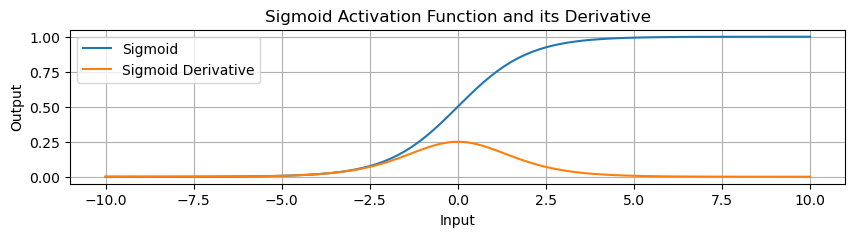

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

y_derivative = sigmoid_derivative(x)

plt.figure(figsize=(10, 2))

plt.plot(x, y, label='Sigmoid')
plt.plot(x, y_derivative, label='Sigmoid Derivative')
plt.title('Sigmoid Activation Function and its Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()


## Hyperbolic Tangent Function Derivative

The hyperbolic tangent function is defined as:
$$\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$
Let's derive its derivative step by step:

### Step 1: Apply the Quotient Rule
We can view $\tanh(x)$ as a quotient function $\frac{u(x)}{v(x)}$ where:
- $u(x) = e^{x} - e^{-x}$
- $v(x) = e^{x} + e^{-x}$
  
Using the quotient rule: $\frac{d}{dx} \left( \frac{u}{v} \right) = \frac{u' v - u v'}{v^2}$

### Step 2: Find Each Component
1. For $u(x) = e^{x} - e^{-x}$:
   $$u'(x) = e^{x} + e^{-x}$$
2. For $v(x) = e^{x} + e^{-x}$:
   $$v'(x) = e^{x} - e^{-x}$$

### Step 3: Apply the Quotient Rule
$$\frac{d\tanh(x)}{dx} = \frac{(e^{x} + e^{-x})(e^{x} + e^{-x}) - (e^{x} - e^{-x})(e^{x} - e^{-x})}{(e^{x} + e^{-x})^2}$$
Simplify the numerator:
$$(e^{x} + e^{-x})^2 - (e^{x} - e^{-x})^2 = [e^{2x} + 2 + e^{-2x}] - [e^{2x} - 2 + e^{-2x}] = 4$$
So,
$$\frac{d\tanh(x)}{dx} = \frac{4}{(e^{x} + e^{-x})^2}$$

### Step 4: Transform into a More Elegant Form
Recall that $\cosh(x) = \frac{e^{x} + e^{-x}}{2}$, so $(e^{x} + e^{-x})^2 = 4 \cosh^2(x)$ and $\frac{4}{(e^{x} + e^{-x})^2} = \frac{1}{\cosh^2(x)} = \operatorname{sech}^2(x)$.
Using the hyperbolic identity $\cosh^2(x) - \sinh^2(x) = 1$, divide both sides by $\cosh^2(x)$:
$$1 - \left( \frac{\sinh(x)}{\cosh(x)} \right)^2 = \frac{1}{\cosh^2(x)} \implies 1 - \tanh^2(x) = \operatorname{sech}^2(x)$$

### Step 5: Combine Terms
$$\frac{d\tanh(x)}{dx} = \operatorname{sech}^2(x) = 1 - \tanh^2(x)$$

This final form shows why the hyperbolic tangent function is computationally efficient - we can compute the derivative directly from the function value itself without additional exponential calculations.

In [4]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2    

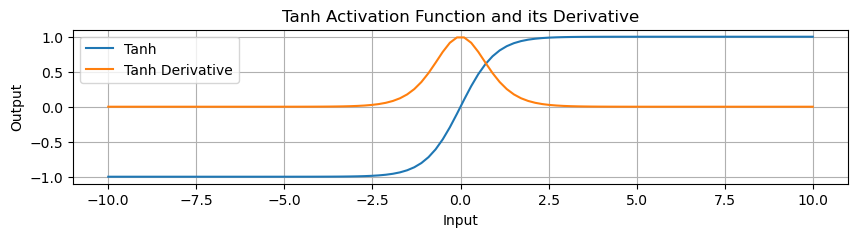

In [5]:
# Plotting tanh and its derivative
x = np.linspace(-10, 10, 100)
y = tanh(x)
y_derivative = tanh_derivative(x)   
plt.figure(figsize=(10, 2))
plt.plot(x, y, label='Tanh')
plt.plot(x, y_derivative, label='Tanh Derivative')
plt.title('Tanh Activation Function and its Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()


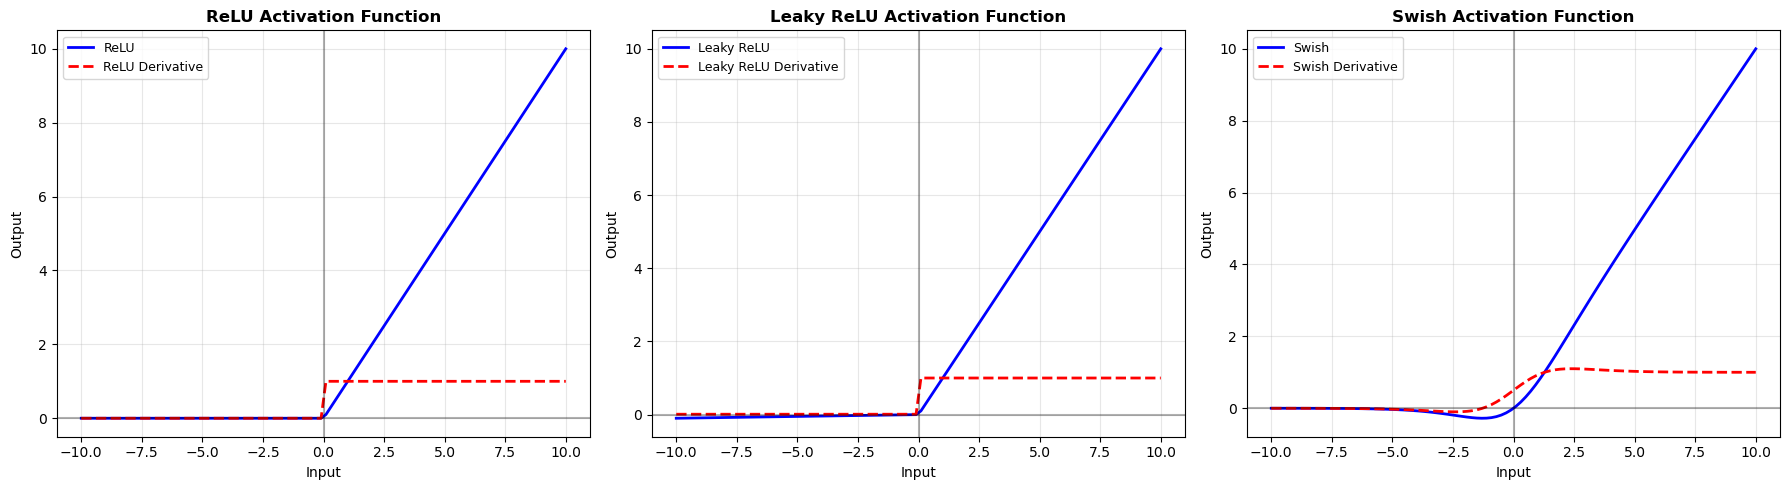

In [9]:
# Define activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def swish(x, beta=1):
    return x * sigmoid(beta * x)

def swish_derivative(x, beta=1):
    s = sigmoid(beta * x)
    return s + beta * x * s * (1 - s)

# Generate data
x = np.linspace(-10, 10, 100)

# Create 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ReLU plot
y_relu = relu(x)
y_relu_derivative = relu_derivative(x)
axes[0].plot(x, y_relu, 'b-', linewidth=2, label='ReLU')
axes[0].plot(x, y_relu_derivative, 'r--', linewidth=2, label='ReLU Derivative')
axes[0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[0].set_title('ReLU Activation Function', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Input', fontsize=10)
axes[0].set_ylabel('Output', fontsize=10)
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Leaky ReLU plot
y_leaky = leaky_relu(x)
y_leaky_derivative = leaky_relu_derivative(x)
axes[1].plot(x, y_leaky, 'b-', linewidth=2, label='Leaky ReLU')
axes[1].plot(x, y_leaky_derivative, 'r--', linewidth=2, label='Leaky ReLU Derivative')
axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1].set_title('Leaky ReLU Activation Function', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Input', fontsize=10)
axes[1].set_ylabel('Output', fontsize=10)
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

# Swish plot
y_swish = swish(x)
y_swish_derivative = swish_derivative(x)
axes[2].plot(x, y_swish, 'b-', linewidth=2, label='Swish')
axes[2].plot(x, y_swish_derivative, 'r--', linewidth=2, label='Swish Derivative')
axes[2].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[2].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[2].set_title('Swish Activation Function', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Input', fontsize=10)
axes[2].set_ylabel('Output', fontsize=10)
axes[2].legend(fontsize=9)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()